In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/aapl_2016_2020.csv")

# Display the first few rows
df.head()


C:\Users\bobov\AppData\Local\Temp\ipykernel_3776\2202469978.py:4: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/aapl_2016_2020.csv")


,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
0,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,0.90886,0.00019,...,0.01,-0.00034,0.00011,0.00079,-0.00509,-0.00041,1.625550,0.000000,57.9,0.367
1,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,1.00000,0.00000,...,0.01,-0.00069,0.00010,0.00039,-0.00518,-0.00010,1.461900,200.000000,52.9,0.335
2,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,1.00000,0.00000,...,0.04,-0.00066,0.00020,0.00000,-0.00425,-0.00009,1.305490,706.000000,47.9,0.303
3,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,1.00000,0.00000,...,0.01,-0.00120,0.00021,0.00089,-0.00434,-0.00005,1.155130,0.000000,42.9,0.272
4,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,1.00000,0.00000,...,0.01,-0.00109,0.00024,0.00045,-0.00429,-0.00020,1.010620,0.000000,37.9,0.240


In [2]:
for col in df.columns:
    print(repr(col))  # Show EXACT format, including hidden characters


'[QUOTE_UNIXTIME]'
' [QUOTE_READTIME]'
' [QUOTE_DATE]'
' [QUOTE_TIME_HOURS]'
' [UNDERLYING_LAST]'
' [EXPIRE_DATE]'
' [EXPIRE_UNIX]'
' [DTE]'
' [C_DELTA]'
' [C_GAMMA]'
' [C_VEGA]'
' [C_THETA]'
' [C_RHO]'
' [C_IV]'
' [C_VOLUME]'
' [C_LAST]'
' [C_SIZE]'
' [C_BID]'
' [C_ASK]'
' [STRIKE]'
' [P_BID]'
' [P_ASK]'
' [P_SIZE]'
' [P_LAST]'
' [P_DELTA]'
' [P_GAMMA]'
' [P_VEGA]'
' [P_THETA]'
' [P_RHO]'
' [P_IV]'
' [P_VOLUME]'
' [STRIKE_DISTANCE]'
' [STRIKE_DISTANCE_PCT]'


In [3]:
df.columns = df.columns.str.replace(r"[^\w]", "", regex=True)  # Remove spaces & special chars
print(df.columns)  # Check if 'QUOTE_DATE' is now clean


Index(['QUOTE_UNIXTIME', 'QUOTE_READTIME', 'QUOTE_DATE', 'QUOTE_TIME_HOURS',
       'UNDERLYING_LAST', 'EXPIRE_DATE', 'EXPIRE_UNIX', 'DTE', 'C_DELTA',
       'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME', 'C_LAST',
       'C_SIZE', 'C_BID', 'C_ASK', 'STRIKE', 'P_BID', 'P_ASK', 'P_SIZE',
       'P_LAST', 'P_DELTA', 'P_GAMMA', 'P_VEGA', 'P_THETA', 'P_RHO', 'P_IV',
       'P_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT'],
      dtype='object')


In [4]:
print(df.columns)  # Should now print correct column names


Index(['QUOTE_UNIXTIME', 'QUOTE_READTIME', 'QUOTE_DATE', 'QUOTE_TIME_HOURS',
       'UNDERLYING_LAST', 'EXPIRE_DATE', 'EXPIRE_UNIX', 'DTE', 'C_DELTA',
       'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME', 'C_LAST',
       'C_SIZE', 'C_BID', 'C_ASK', 'STRIKE', 'P_BID', 'P_ASK', 'P_SIZE',
       'P_LAST', 'P_DELTA', 'P_GAMMA', 'P_VEGA', 'P_THETA', 'P_RHO', 'P_IV',
       'P_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT'],
      dtype='object')


In [5]:
# Ensure these columns are actually datetime, force conversion
df["QUOTE_DATE"] = pd.to_datetime(df["QUOTE_DATE"], errors="coerce")
df["EXPIRE_DATE"] = pd.to_datetime(df["EXPIRE_DATE"], errors="coerce")

# Check if they are datetime now
print(df.dtypes)


QUOTE_UNIXTIME                  int64
QUOTE_READTIME                 object
QUOTE_DATE             datetime64[ns]
QUOTE_TIME_HOURS              float64
UNDERLYING_LAST               float64
EXPIRE_DATE            datetime64[ns]
EXPIRE_UNIX                     int64
DTE                           float64
C_DELTA                       float64
C_GAMMA                       float64
C_VEGA                        float64
C_THETA                       float64
C_RHO                         float64
C_IV                           object
C_VOLUME                       object
C_LAST                         object
C_SIZE                         object
C_BID                          object
C_ASK                          object
STRIKE                        float64
P_BID                          object
P_ASK                          object
P_SIZE                         object
P_LAST                         object
P_DELTA                       float64
P_GAMMA                       float64
P_VEGA      

In [9]:
df["T"] = pd.to_numeric(df["T"], errors="coerce")
df["C_IV"] = pd.to_numeric(df["C_IV"], errors="coerce")
df["P_IV"] = pd.to_numeric(df["P_IV"], errors="coerce")


In [10]:
df = df[(df["T"] > 0) & (df["C_IV"] > 0) & (df["P_IV"] > 0)]

In [6]:
df["T"] = (df["EXPIRE_DATE"] - df["QUOTE_DATE"]).dt.days / 365

In [11]:
print(df.dtypes)


QUOTE_UNIXTIME                  int64
QUOTE_READTIME                 object
QUOTE_DATE             datetime64[ns]
QUOTE_TIME_HOURS              float64
UNDERLYING_LAST               float64
EXPIRE_DATE            datetime64[ns]
EXPIRE_UNIX                     int64
DTE                           float64
C_DELTA                       float64
C_GAMMA                       float64
C_VEGA                        float64
C_THETA                       float64
C_RHO                         float64
C_IV                          float64
C_VOLUME                       object
C_LAST                         object
C_SIZE                         object
C_BID                          object
C_ASK                          object
STRIKE                        float64
P_BID                          object
P_ASK                          object
P_SIZE                         object
P_LAST                         object
P_DELTA                       float64
P_GAMMA                       float64
P_VEGA      

In [12]:
from scipy.stats import norm
import numpy as np

def black_scholes(S, K, T, r, sigma, option_type="call"):
    """Compute Black-Scholes price for European options."""
    if T <= 0:
        return max(0, S - K) if option_type == "call" else max(0, K - S)
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:  # Put option
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)


In [13]:
# Apply Black-Scholes to compute call and put option prices
df["BS_Call"] = df.apply(lambda row: black_scholes(
    row["UNDERLYING_LAST"], 
    row["STRIKE"], 
    row["T"], 
    0.02,  # Assumed risk-free rate of 2%
    row["C_IV"], 
    "call"), axis=1)

df["BS_Put"] = df.apply(lambda row: black_scholes(
    row["UNDERLYING_LAST"], 
    row["STRIKE"], 
    row["T"], 
    0.02,  # Assumed risk-free rate of 2%
    row["P_IV"], 
    "put"), axis=1)

df.head()  # Check if the columns are properly added


,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,...,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,T,BS_Call,BS_Put
0,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,0.90886,0.00019,...,0.00079,-0.00509,-0.00041,1.62555,0.000000,57.9,0.367,0.005479,58.265413,0.000259
14,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,0.91296,0.00467,...,0.00069,-0.00467,-0.00010,0.73427,87.000000,27.9,0.177,0.005479,28.227897,0.000328
20,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,0.91458,0.00657,...,0.00192,-0.00899,-0.00005,0.61760,134.000000,21.9,0.139,0.005479,22.159561,0.000951
25,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,0.90212,0.01039,...,0.00369,-0.02463,-0.00060,0.54751,,16.9,0.107,0.005479,17.184160,0.004618
26,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.0,0.87997,0.01242,...,0.00523,-0.02846,-0.00056,0.52870,566.000000,15.9,0.101,0.005479,16.322256,0.005856


In [15]:
print(df[["BS_Call", "C_BID", "C_ASK"]].isnull().sum())  # Count NaNs
print(df[["BS_Call", "C_BID", "C_ASK"]].applymap(lambda x: isinstance(x, str)).sum())  # Count strings


BS_Call    0
C_BID      0
C_ASK      0
dtype: int64


C:\Users\bobov\AppData\Local\Temp\ipykernel_3776\1924589854.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df[["BS_Call", "C_BID", "C_ASK"]].applymap(lambda x: isinstance(x, str)).sum())  # Count strings


BS_Call        0
C_BID      39752
C_ASK      39752
dtype: int64


In [16]:
df["BS_Call"] = pd.to_numeric(df["BS_Call"], errors="coerce")
df["C_BID"] = pd.to_numeric(df["C_BID"], errors="coerce")
df["C_ASK"] = pd.to_numeric(df["C_ASK"], errors="coerce")


In [17]:
print(df[["BS_Call", "C_BID", "C_ASK"]].dtypes)


BS_Call    float64
C_BID      float64
C_ASK      float64
dtype: object


In [18]:
df = df.dropna(subset=["BS_Call", "C_BID", "C_ASK"])


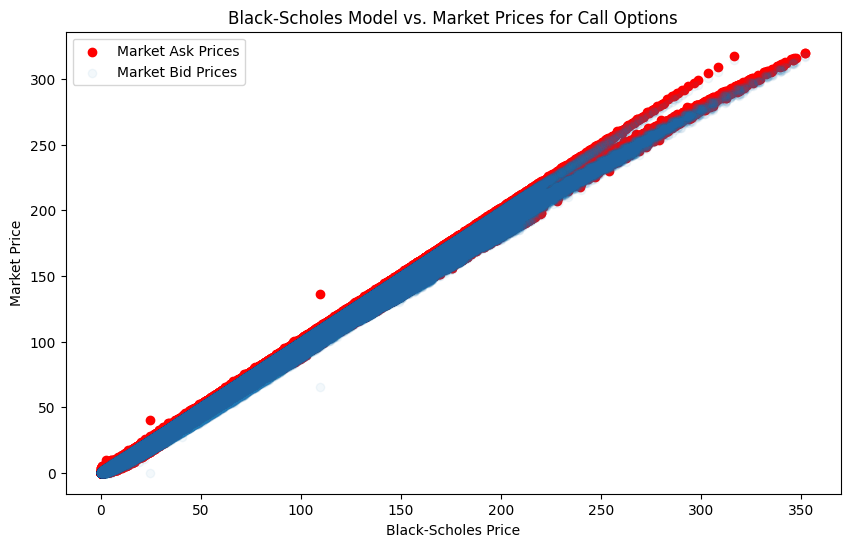

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df["BS_Call"], df["C_ASK"], alpha=1, label="Market Ask Prices", color="red")
plt.scatter(df["BS_Call"], df["C_BID"], alpha=0.05, label="Market Bid Prices")
plt.xlabel("Black-Scholes Price")
plt.ylabel("Market Price")
plt.legend()
plt.title("Black-Scholes Model vs. Market Prices for Call Options")
plt.show()


In [29]:
df["error_bid"] = df["BS_Call"] - df["C_BID"]
df["error_ask"] = df["BS_Call"] - df["C_ASK"]

# Summary statistics of the errors
print(df[["error_bid", "error_ask"]].describe())


           error_bid      error_ask
count  733522.000000  733522.000000
mean        2.034019       1.206827
std         3.080456       2.392669
min        -2.056936     -26.365715
25%         0.123932      -0.024368
50%         0.667969       0.200003
75%         2.618967       1.551448
max        44.634285      32.286328


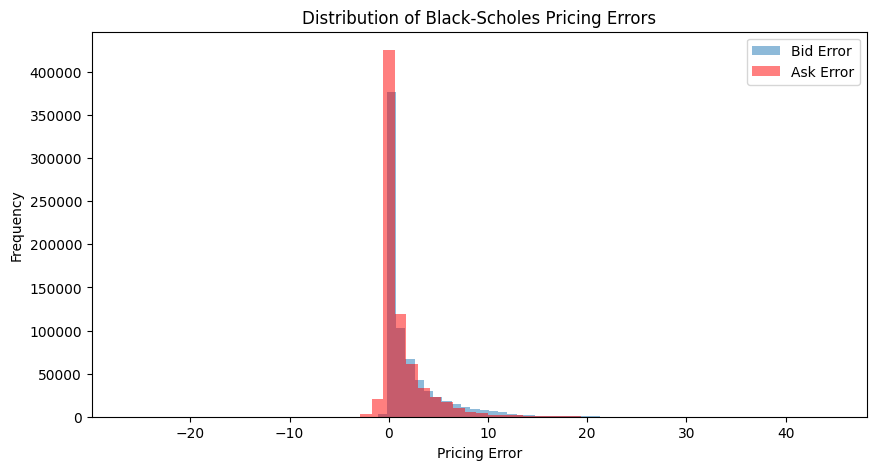

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df["error_bid"], bins=50, alpha=0.5, label="Bid Error")
plt.hist(df["error_ask"], bins=50, alpha=0.5, label="Ask Error", color="red")
plt.xlabel("Pricing Error")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Black-Scholes Pricing Errors")
plt.show()


In [31]:
import numpy as np
from scipy.stats import entropy

# Compute histogram of errors
hist_bid, bin_edges = np.histogram(df["error_bid"], bins=50, density=True)
hist_ask, _ = np.histogram(df["error_ask"], bins=50, density=True)

# Remove zero values (log(0) is undefined)
hist_bid = hist_bid[hist_bid > 0]
hist_ask = hist_ask[hist_ask > 0]


In [32]:
# Compute entropy of pricing errors
entropy_bid = entropy(hist_bid)
entropy_ask = entropy(hist_ask)

print(f"Shannon Entropy of Bid Error Distribution: {entropy_bid:.4f}")
print(f"Shannon Entropy of Ask Error Distribution: {entropy_ask:.4f}")


Shannon Entropy of Bid Error Distribution: 1.8011
Shannon Entropy of Ask Error Distribution: 1.4940


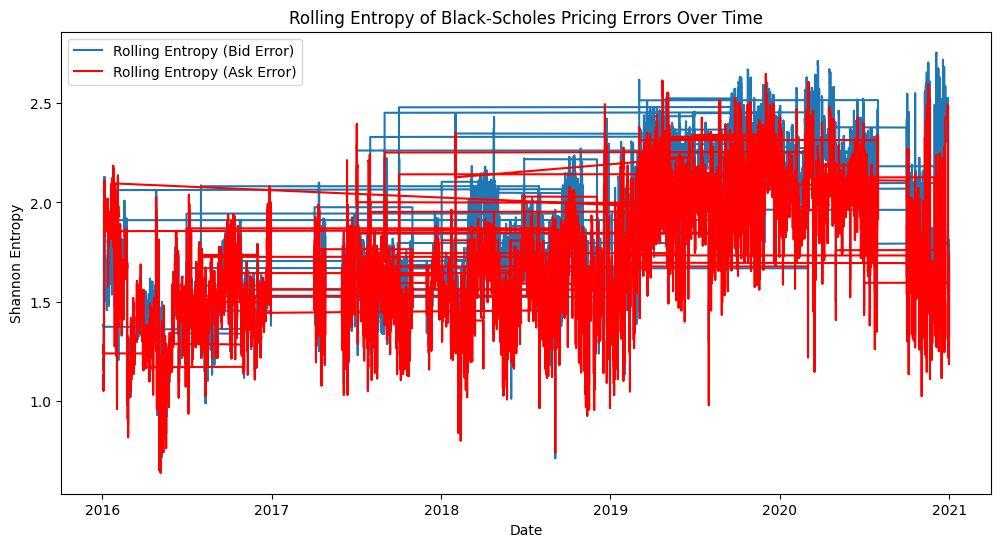

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute rolling entropy over time
window_size = 1000  # Adjust as needed
rolling_entropy_bid = df["error_bid"].rolling(window=window_size).apply(lambda x: entropy(np.histogram(x, bins=20, density=True)[0]), raw=True)
rolling_entropy_ask = df["error_ask"].rolling(window=window_size).apply(lambda x: entropy(np.histogram(x, bins=20, density=True)[0]), raw=True)

# Plot rolling entropy
plt.figure(figsize=(12, 6))
plt.plot(df["QUOTE_DATE"], rolling_entropy_bid, label="Rolling Entropy (Bid Error)")
plt.plot(df["QUOTE_DATE"], rolling_entropy_ask, label="Rolling Entropy (Ask Error)", color="red")
plt.xlabel("Date")
plt.ylabel("Shannon Entropy")
plt.legend()
plt.title("Rolling Entropy of Black-Scholes Pricing Errors Over Time")
plt.show()


In [36]:
import numpy as np
from scipy.stats import entropy

# Function to compute entropy from a rolling window
def compute_entropy(series, bins=20):
    hist, _ = np.histogram(series, bins=bins, density=True)
    hist = hist[hist > 0]  # Remove zero values
    return entropy(hist) if len(hist) > 0 else np.nan  # Avoid NaN issues

# Compute rolling entropy for bid and ask errors
window_size = 1000  # Adjust as needed
df["rolling_entropy_bid"] = df["error_bid"].rolling(window=window_size).apply(compute_entropy, raw=True)
df["rolling_entropy_ask"] = df["error_ask"].rolling(window=window_size).apply(compute_entropy, raw=True)


In [37]:
# Compute rolling mean of implied volatility (IV)
window_size = 1000  # Match entropy window
df["rolling_IV"] = df["C_IV"].rolling(window=window_size).mean()


In [38]:
# Drop NaN values for clean correlation analysis
valid_data = df.dropna(subset=["rolling_IV", "rolling_entropy_bid", "rolling_entropy_ask"])

# Compute correlation
corr_bid = valid_data["rolling_entropy_bid"].corr(valid_data["rolling_IV"])
corr_ask = valid_data["rolling_entropy_ask"].corr(valid_data["rolling_IV"])

print(f"Correlation between Bid Error Entropy & Implied Volatility: {corr_bid:.4f}")
print(f"Correlation between Ask Error Entropy & Implied Volatility: {corr_ask:.4f}")


Correlation between Bid Error Entropy & Implied Volatility: 0.0717
Correlation between Ask Error Entropy & Implied Volatility: -0.0012


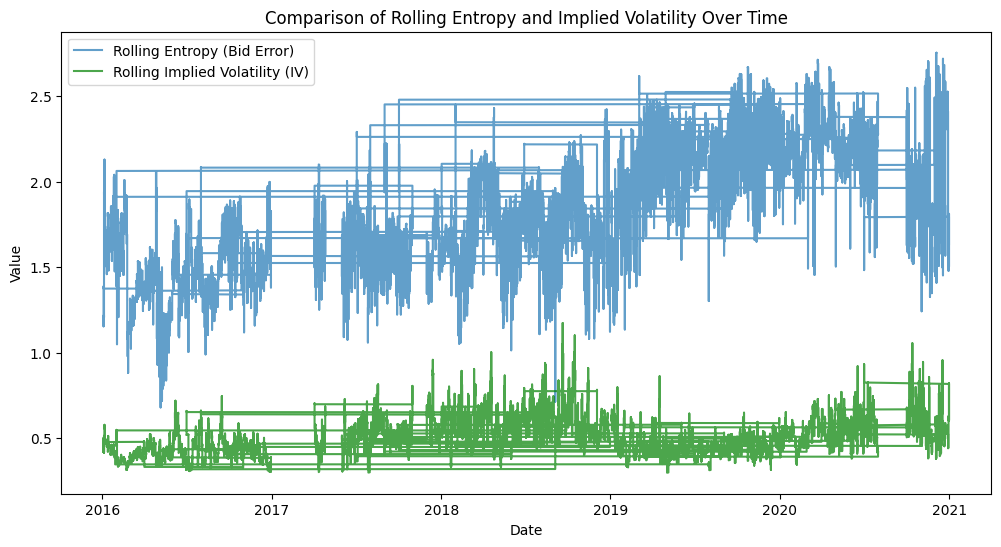

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df["QUOTE_DATE"], df["rolling_entropy_bid"], label="Rolling Entropy (Bid Error)", alpha=0.7)
plt.plot(df["QUOTE_DATE"], df["rolling_IV"], label="Rolling Implied Volatility (IV)", color="green", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison of Rolling Entropy and Implied Volatility Over Time")
plt.show()


In [40]:
# Drop NaN values for clean correlation analysis
valid_data = df.dropna(subset=["rolling_IV", "rolling_entropy_bid"])

# Compute correlation between rolling entropy and IV
corr_entropy_iv = valid_data["rolling_entropy_bid"].corr(valid_data["rolling_IV"])

print(f"Correlation between Rolling Entropy (Bid Error) & Rolling Implied Volatility: {corr_entropy_iv:.4f}")


Correlation between Rolling Entropy (Bid Error) & Rolling Implied Volatility: 0.0717


In [41]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

# Drop NaN values for clean MI analysis
valid_data = df.dropna(subset=["rolling_IV", "rolling_entropy_bid"])

# Prepare input and target variables
X = valid_data[["rolling_IV"]].values  # Feature (IV)
y = valid_data["rolling_entropy_bid"].values  # Target (entropy)

# Compute mutual information
mi_score = mutual_info_regression(X, y, discrete_features=False)[0]

print(f"Mutual Information Between Rolling IV & Rolling Entropy: {mi_score:.4f}")


Mutual Information Between Rolling IV & Rolling Entropy: 0.9756


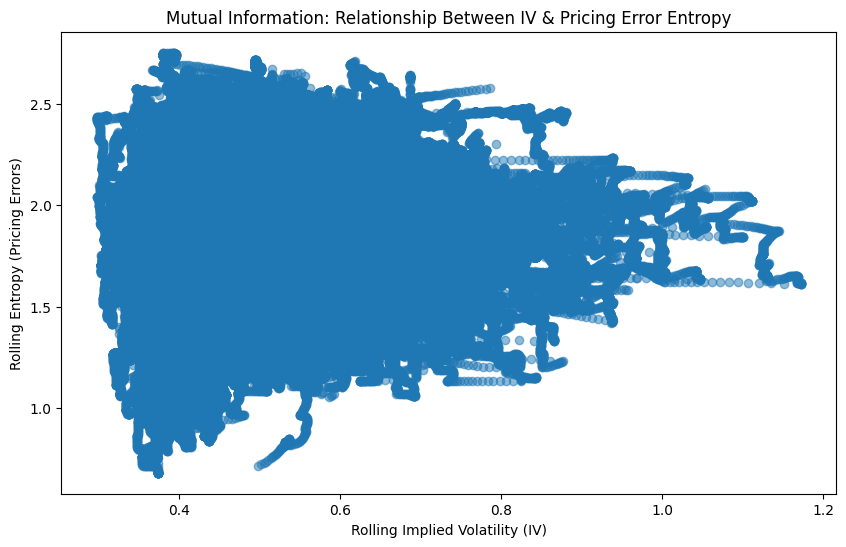

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(valid_data["rolling_IV"], valid_data["rolling_entropy_bid"], alpha=0.5)
plt.xlabel("Rolling Implied Volatility (IV)")
plt.ylabel("Rolling Entropy (Pricing Errors)")
plt.title("Mutual Information: Relationship Between IV & Pricing Error Entropy")
plt.show()


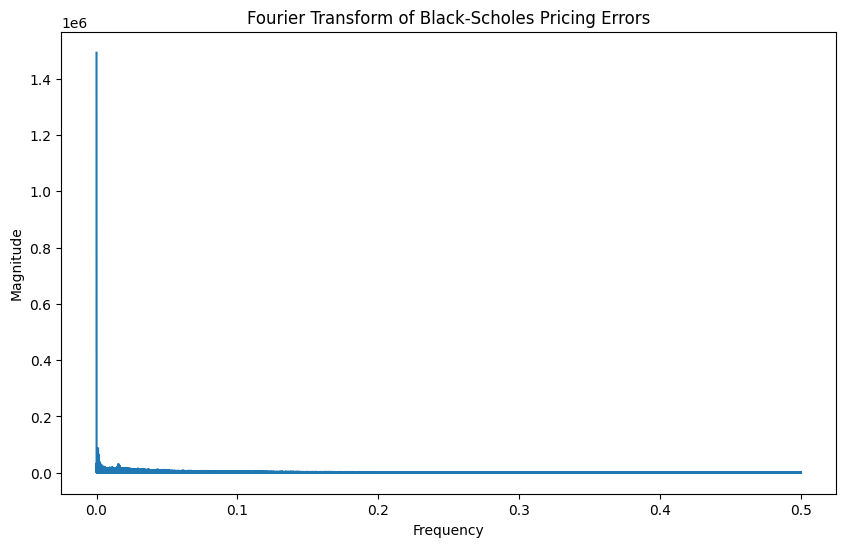

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Drop NaN values to avoid issues
valid_errors = df["error_bid"].dropna().values

# Compute FFT
fft_result = np.fft.fft(valid_errors)
frequencies = np.fft.fftfreq(len(valid_errors))

# Plot FFT Magnitude Spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(frequencies)//2])
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of Black-Scholes Pricing Errors")
plt.show()


In [44]:
# Find dominant frequencies
dominant_freqs = frequencies[np.argsort(np.abs(fft_result))[-5:]]  # Top 5 frequencies

print("Top 5 dominant frequencies in pricing errors:", dominant_freqs)


Top 5 dominant frequencies in pricing errors: [-1.77227132e-05  1.77227132e-05 -1.36328563e-06  1.36328563e-06
  0.00000000e+00]


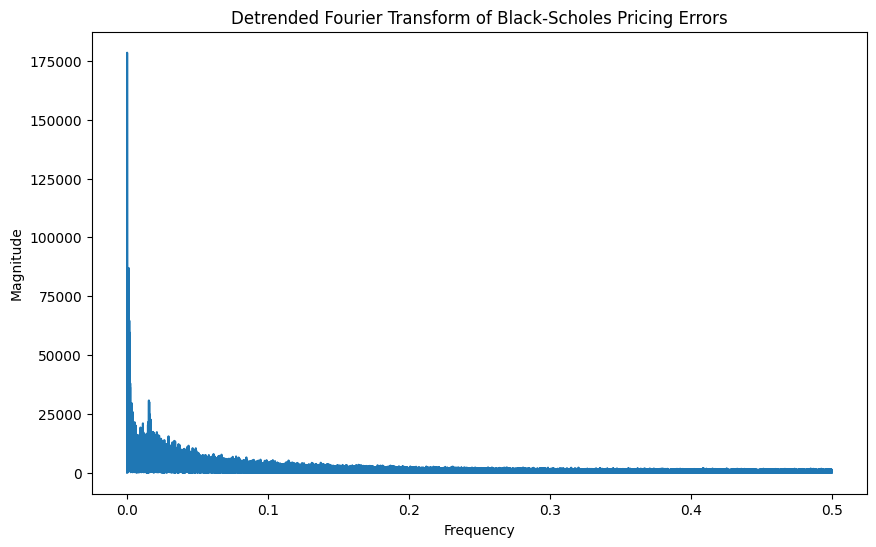

In [45]:
from scipy.signal import detrend

# Remove long-term trend
detrended_errors = detrend(valid_errors)

# Compute FFT again on detrended data
fft_result_detrended = np.fft.fft(detrended_errors)

# Plot FFT again
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result_detrended)[:len(frequencies)//2])
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Detrended Fourier Transform of Black-Scholes Pricing Errors")
plt.show()


C:\Users\bobov\AppData\Local\Programs\Python\Python313\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


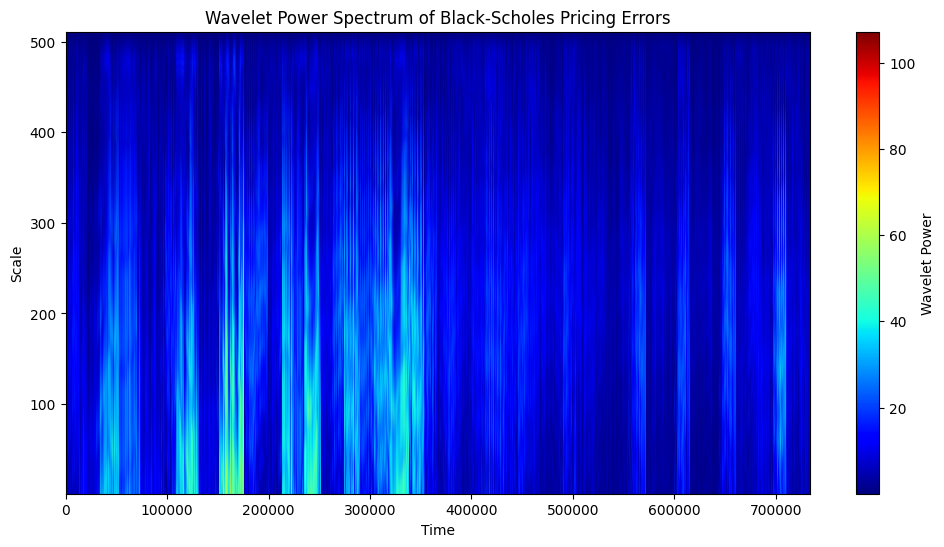

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Drop NaN values
valid_errors = df["error_bid"].dropna().values

# Define wavelet parameters
scales = np.arange(1, 512)  # Scale range
wavelet = "cmor"  # Complex Morlet wavelet

# Compute Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(valid_errors, scales, wavelet)

# Plot Wavelet Power Spectrum
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect="auto", extent=[0, len(valid_errors), min(scales), max(scales)], cmap="jet")
plt.colorbar(label="Wavelet Power")
plt.xlabel("Time")
plt.ylabel("Scale")
plt.title("Wavelet Power Spectrum of Black-Scholes Pricing Errors")
plt.show()


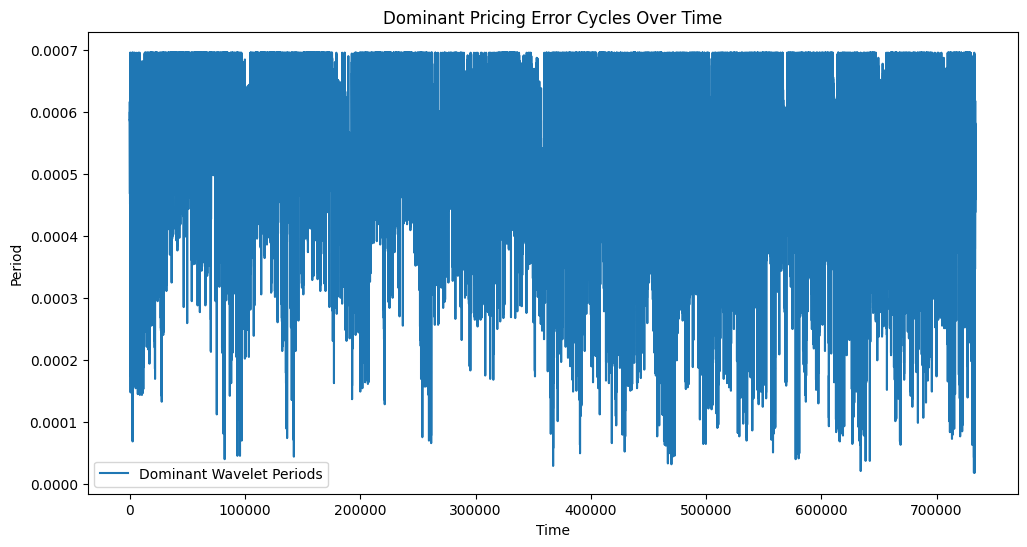

In [48]:
# Find dominant wavelet scales over time
dominant_scales = np.argmax(np.abs(coefficients), axis=0)

# Convert scales to approximate time periods
dominant_periods = dominant_scales * (1 / len(valid_errors))  # Approximate period in normalized time

plt.figure(figsize=(12, 6))
plt.plot(dominant_periods, label="Dominant Wavelet Periods")
plt.xlabel("Time")
plt.ylabel("Period")
plt.title("Dominant Pricing Error Cycles Over Time")
plt.legend()
plt.show()


In [52]:
import numpy as np

# Define thresholds based on percentiles
low_vol_threshold = df["rolling_IV"].quantile(0.25)  # 25th percentile (low volatility)
high_vol_threshold = df["rolling_IV"].quantile(0.75)  # 75th percentile (high volatility)

# Assign volatility regimes
df["volatility_regime"] = "medium"
df.loc[df["rolling_IV"] <= low_vol_threshold, "volatility_regime"] = "low"
df.loc[df["rolling_IV"] >= high_vol_threshold, "volatility_regime"] = "high"

# Check distribution
df["volatility_regime"].value_counts()


volatility_regime
medium    367260
high      183131
low       183131
Name: count, dtype: int64

In [55]:
import pandas as pd

# Compute mean and standard deviation of pricing errors in each regime
error_stats = df.groupby("volatility_regime")[["error_bid", "error_ask"]].agg(["mean", "std"])

# Display results
print(error_stats)


                  error_bid           error_ask          
                       mean       std      mean       std
volatility_regime                                        
high               2.264360  3.321722  1.267534  2.680887
low                1.693200  2.719207  1.055741  1.990864
medium             2.089108  3.110682  1.251893  2.420487


In [57]:
import numpy as np
import statsmodels.api as sm

# Drop NaN values
valid_data = df.dropna(subset=["rolling_IV", "error_bid"])

# Define features (IV) and target (pricing error)
X = valid_data["rolling_IV"].values.reshape(-1, 1)
y = valid_data["error_bid"].values

# Add constant term for regression
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Display model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2640.
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:00:20   Log-Likelihood:            -1.8625e+06
No. Observations:              732523   AIC:                         3.725e+06
Df Residuals:                  732521   BIC:                         3.725e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2005      0.017     72.173      0.0

In [58]:
# Predict error correction term
df["BS_correction"] = model.predict(sm.add_constant(df["rolling_IV"]))

# Apply correction to Black-Scholes prices
df["BS_corrected"] = df["BS_Call"] + df["BS_correction"]


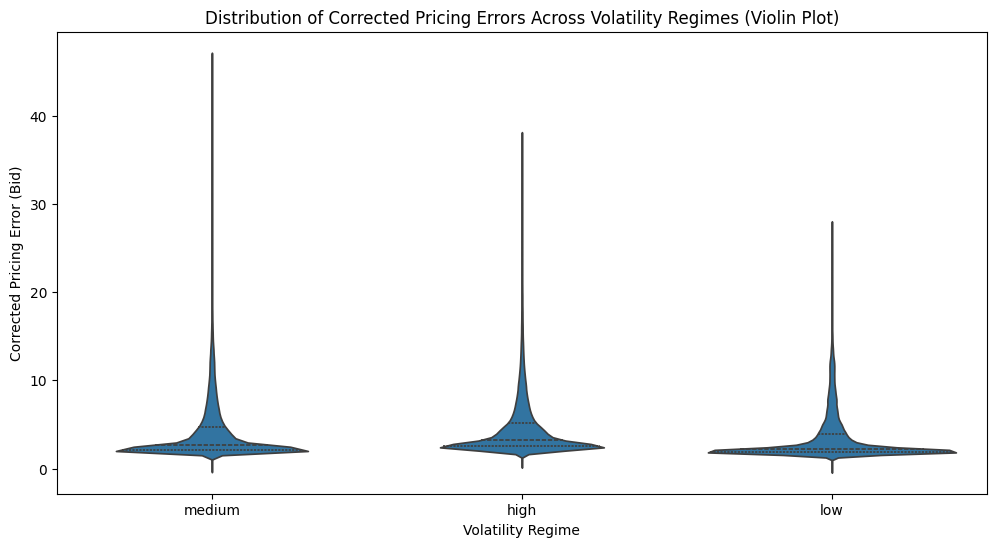

In [61]:
df["C_BID"] = pd.to_numeric(df["C_BID"], errors="coerce")  # Convert to float
df["BS_corrected"] = pd.to_numeric(df["BS_corrected"], errors="coerce")  # Convert if needed

import matplotlib.pyplot as plt
import seaborn as sns

# Create a violin plot for better visualization of error distributions
plt.figure(figsize=(12, 6))
sns.violinplot(x=df["volatility_regime"], y=df["BS_corrected"] - df["C_BID"], inner="quartile")
plt.xlabel("Volatility Regime")
plt.ylabel("Corrected Pricing Error (Bid)")
plt.title("Distribution of Corrected Pricing Errors Across Volatility Regimes (Violin Plot)")
plt.show()



In [62]:
import numpy as np
import statsmodels.api as sm

# Drop NaN values
valid_data = df.dropna(subset=["rolling_IV", "rolling_entropy_bid", "error_bid"])

# Define features (IV and entropy) and target (pricing error)
X = valid_data[["rolling_IV", "rolling_entropy_bid"]]
y = valid_data["error_bid"]

# Add constant term for regression
X = sm.add_constant(X)

# Fit regression model
model_entropy = sm.OLS(y, X).fit()

# Display model summary
print(model_entropy.summary())


                            OLS Regression Results                            
Dep. Variable:              error_bid   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                 1.902e+04
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:07:30   Log-Likelihood:            -1.8453e+06
No. Observations:              732523   AIC:                         3.691e+06
Df Residuals:                  732520   BIC:                         3.691e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1173    

In [63]:
# Predict error correction term using entropy-enhanced model
df["BS_entropy_correction"] = model_entropy.predict(sm.add_constant(df[["rolling_IV", "rolling_entropy_bid"]]))

# Apply correction to Black-Scholes prices
df["BS_corrected_entropy"] = df["BS_Call"] + df["BS_entropy_correction"]


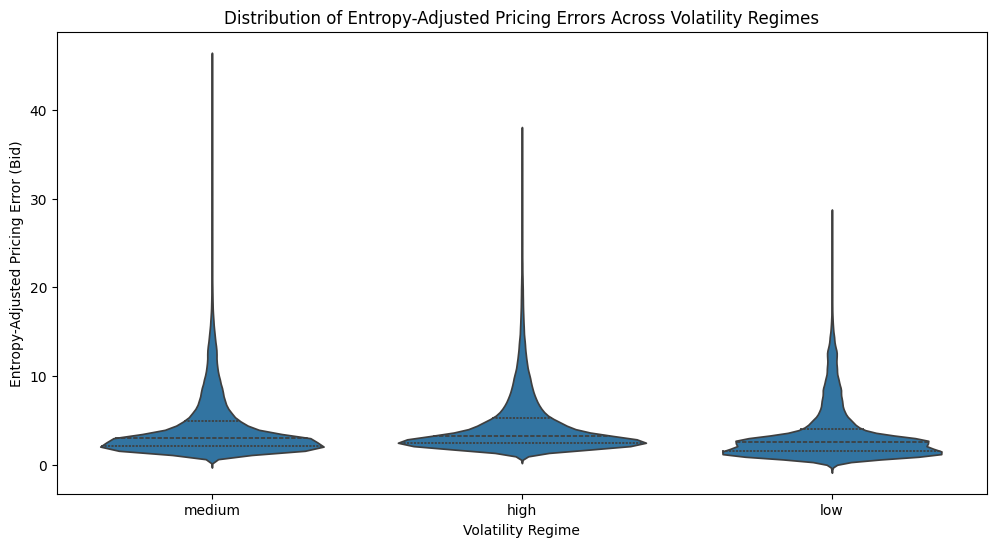

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.violinplot(x=df["volatility_regime"], y=df["BS_corrected_entropy"] - df["C_BID"], inner="quartile")
plt.xlabel("Volatility Regime")
plt.ylabel("Entropy-Adjusted Pricing Error (Bid)")
plt.title("Distribution of Entropy-Adjusted Pricing Errors Across Volatility Regimes")
plt.show()


In [65]:
import numpy as np
import statsmodels.api as sm

# Drop NaN values
valid_data = df.dropna(subset=["rolling_IV", "rolling_entropy_bid", "error_bid"])

# Define nonlinear features
valid_data["IV_squared"] = valid_data["rolling_IV"] ** 2
valid_data["entropy_squared"] = valid_data["rolling_entropy_bid"] ** 2
valid_data["IV_entropy_interaction"] = valid_data["rolling_IV"] * valid_data["rolling_entropy_bid"]

# Define features and target
X_nonlinear = valid_data[["rolling_IV", "rolling_entropy_bid", "IV_squared", "entropy_squared", "IV_entropy_interaction"]]
y_nonlinear = valid_data["error_bid"]

# Add constant term for regression
X_nonlinear = sm.add_constant(X_nonlinear)

# Fit nonlinear regression model
model_nonlinear = sm.OLS(y_nonlinear, X_nonlinear).fit()

# Display model summary
print(model_nonlinear.summary())


C:\Users\bobov\AppData\Local\Temp\ipykernel_3776\1836622593.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data["IV_squared"] = valid_data["rolling_IV"] ** 2
C:\Users\bobov\AppData\Local\Temp\ipykernel_3776\1836622593.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data["entropy_squared"] = valid_data["rolling_entropy_bid"] ** 2
C:\Users\bobov\AppData\Local\Temp\ipykernel_3776\1836622593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

                            OLS Regression Results                            
Dep. Variable:              error_bid   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     8134.
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:13:50   Log-Likelihood:            -1.8440e+06
No. Observations:              732523   AIC:                         3.688e+06
Df Residuals:                  732517   BIC:                         3.688e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4

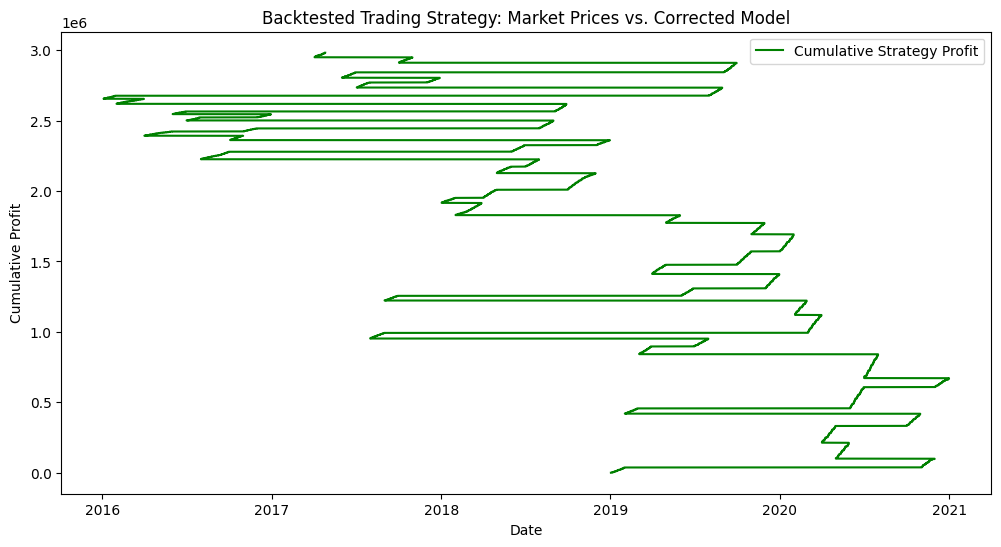

In [66]:
import numpy as np
import pandas as pd

# Define trade signals
df["buy_signal"] = df["C_BID"] < df["BS_corrected_entropy"]  # Buy when market bid is lower than corrected price
df["sell_signal"] = df["C_ASK"] > df["BS_corrected_entropy"]  # Sell when market ask is higher

# Simulate profits
df["profit"] = np.where(df["buy_signal"], df["BS_corrected_entropy"] - df["C_BID"], 0) + \
               np.where(df["sell_signal"], df["C_ASK"] - df["BS_corrected_entropy"], 0)

# Rolling cumulative profit over time
df["cumulative_profit"] = df["profit"].cumsum()

# Plot cumulative profit
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df["QUOTE_DATE"], df["cumulative_profit"], label="Cumulative Strategy Profit", color="green")
plt.xlabel("Date")
plt.ylabel("Cumulative Profit")
plt.title("Backtested Trading Strategy: Market Prices vs. Corrected Model")
plt.legend()
plt.show()


In [ ]:
## 📈 Proposed Trading Strategy

Our research suggests that **systematic mispricings** in options markets can be exploited using a **corrected Black-Scholes model**, adjusted for **market entropy and volatility regimes**. Below, we outline a structured approach to turn this insight into a potential trading strategy.

### 🔹 1. Data Pipeline
The strategy relies on **real-time options market data** combined with our **entropy-adjusted Black-Scholes pricing model**.

#### **Required Inputs**
- **Options Market Data** (bid, ask, strike price, expiration, implied volatility, etc.).
- **Corrected Black-Scholes Prices** (BS_corrected from our enhanced model).
- **Entropy Estimates** (rolling entropy of pricing errors).
- **Volatility Regime Classification** (categorizing market conditions dynamically).

#### **Filtering Trade Opportunities**
To enhance trade reliability, we filter options:
- **Exclude options with less than 5 trading days to expiration**.
- **Exclude deep out-of-the-money (OTM) options** (moneyness < 0.8 or > 1.2).
- **Exclude options with low liquidity** (avoiding large bid-ask spreads).
- **Use a smoothing function** to remove excessive noise from pricing errors.

---

### 🔹 2. Signal Generation
Trade signals are **determined by mispricing relative to BS_corrected**, adjusted for **market entropy and volatility regime**.

#### **Trade Criteria**
| Condition | Trade Action |
|-----------|-------------|
| Market Price **above** BS_corrected **(Overpriced Call)** | **Short Call** |
| Market Price **below** BS_corrected **(Underpriced Call)** | **Buy Call** |
| Market Price **above** BS_corrected **(Overpriced Put)** | **Short Put** |
| Market Price **below** BS_corrected **(Underpriced Put)** | **Buy Put** |

#### **Entropy & Regime Adjustments**
- **If entropy is high:**  
  - Reduce position size.
  - Favor shorter holding periods.
- **If entropy is low:**  
  - Increase position size.
  - Hold trades longer for full mispricing correction.
- **If volatility is high:**  
  - Trade deeper in-the-money options to reduce gamma risk.
- **If volatility is low:**  
  - Favor at-the-money options for greater relative mispricing.

---

### 🔹 3. Trade Execution
To minimize execution risk and avoid slippage, the strategy favors **limit orders** over market orders.

#### **Execution Rules**
- **Use a limit order at midpoint price** (between bid/ask).
- **If order isn't filled within 15 min, adjust** (recalculate fair value).
- **Exit strategy:**
  - If price corrects to BS_corrected → Close trade.
  - If entropy spikes suddenly → Close trade.
  - If loss exceeds predefined stop → Close trade.

#### **Hedging Considerations**
- **Delta-neutral strategies**: Instead of outright calls/puts, we could **delta-hedge** with the underlying.
- **Gamma exposure**: If trading short-dated options, **gamma risk must be monitored**.
- **Pair trading opportunities**: If we see opposite signals on put/call pairs of the same strike, a **market-neutral arbitrage trade** may be possible.

---

### 🔹 4. Risk Management
Proper risk controls are essential for long-term sustainability.

#### **Position Sizing**
- **Kelly Criterion-based sizing** using **expected mispricing correction** and entropy.
- **Hard limits** on capital allocation per trade (e.g., max 5% per option).
- **Stop-loss at 1.5x the expected correction range**.

#### **Portfolio-Level Risk**
- **Max drawdown limit** (e.g., stop trading if cumulative loss > 10%).
- **Sector diversification** (avoid concentration in single industry’s options).
- **Daily loss limit** (stop trading if daily PnL is negative beyond a threshold).

---

### 🔹 5. Backtesting & Performance Metrics
A robust backtesting framework ensures **strategy viability before live execution**.

#### **Key Metrics**
| Metric | Purpose |
|--------|---------|
| **Sharpe Ratio** | Measures risk-adjusted returns. |
| **Sortino Ratio** | Focuses on downside risk. |
| **Win Rate** | % of trades closed at a profit. |
| **Maximum Drawdown** | Worst-case loss scenario. |
| **Profit Factor** | Ratio of total profit to total loss. |

#### **Performance Validation**
- **Use historical market data from 2016–2021** (our dataset's range).
- **Compare against a passive buy-and-hold strategy**.
- **Test alternative execution models** (market orders vs. limit orders).

---

### **📌 Conclusion**
This strategy is a **systematic arbitrage approach**—instead of inefficiencies in the underlying stock market, we exploit **options pricing errors** through **entropy analysis, volatility regimes, and Fourier-based market structure analysis**.

📊 The **next step** is implementing a **paper trading simulation** or integrating with a **live brokerage API** (e.g., Interactive Brokers, TD Ameritrade).



In [67]:
df.to_csv("corrected_black_scholes_analysis.csv", index=False)
